# Punto3
## Simulated Annealing
### Nicolás Patalagua

Importamos la librerias que vamos a usar:

In [0]:
import random
!pip install pyeasyga
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt

Ingresamos la cantidad de panqueques:

In [3]:
n = int(input("Digite el tamaño de la stack: "))
Stack = [i for i in range(1, n + 1)]
mejorposible = (n - 1)

Digite el tamaño de la stack: 5


Definimos la función Annealing:

In [0]:
def annealing(estado_inicial, funcion_costo, siguiente_estado, acceptance_probability, temp_inicial,
              temp_decrease_factor, maxsteps):
    state = estado_inicial()
    cost = funcion_costo(state)
    states, costs = [state], [cost]
    num_accep = []
    T = temp_inicial
    while T > 0.01:
        aceptances = 0
        for step in range(maxsteps):
            new_state = siguiente_estado(state)
            new_cost = funcion_costo(new_state)
            if acceptance_probability(cost, new_cost, T) > rn.random():
                state, cost = new_state, new_cost
                states.append(state[:])
                costs.append(cost)
                aceptances += 1
        T *= temp_decrease_factor
        num_accep.append(aceptances)
    best_sol_index = costs.index(min(costs))
    return states[best_sol_index], costs[best_sol_index], states, costs, num_accep

Definimos la función costo:

In [0]:
def cost_function(indivudal):
    consecutivos = 0
    for i in range(len(indivudal)):
        if i > 0:
            if (indivudal[i] - 1) == (indivudal[i - 1]):
                consecutivos += 1
    return abs(mejorposible - consecutivos)

Definimos la función de estado inicial:

In [0]:
def estado_inicial():
    individual = Stack[:]
    random.shuffle(individual)
    return individual

Definimos el siguiente estado de cada individuo:

In [0]:
def siguiente_estado(individual):
    mi = random.randrange(len(individual))
    auxlist = individual[:mi]
    auxlist.reverse()
    for i in range(len(auxlist)):
        individual[i] = auxlist[i]
    return individual

Definimos el algortimo metropolis:

In [0]:
def algoritmo_metropolis(cost, new_cost, temperature):
    if new_cost < cost:
        return 1
    else:
        p = np.exp(- (new_cost - cost) / temperature)
        return p

Definimos las caracteristicas y parametros:

In [0]:
state, c, states, costs, num_accep = annealing(
    estado_inicial,
    cost_function,
    siguiente_estado,
    algoritmo_metropolis,
    temp_inicial=200,
    temp_decrease_factor=0.8,
    maxsteps=50
)

Realizamos las operaciones necesarias:

In [0]:
mejorobtenido = int(c)
prcentaje = float(((100 * mejorobtenido) / mejorposible))

Imprimimos los objetivos solicitados:

In [11]:
print("Porcentaje de error obtenido: " + str(prcentaje) + "%")
print("Costo de la mejor solucion: " + str(mejorobtenido))
print("Mejor costo posible: 0")

Porcentaje de error obtenido: 25.0%
Costo de la mejor solucion: 1
Mejor costo posible: 0


Definimos las caracteristicas de la grafica:

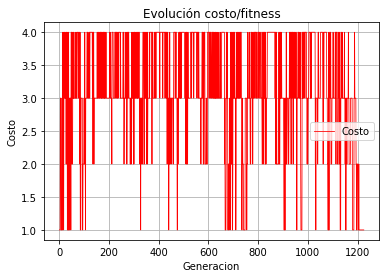

In [12]:
ejex = [i for i in range(len(costs))]
plt.plot(ejex, costs, '-', linewidth=0.8, color='r', label='Costo')
plt.title('Evolución costo/fitness')
plt.xlabel('Generacion')
plt.ylabel('Costo')
plt.legend()
plt.grid()
plt.show()